In [1]:
#Firstly, import the needed basic libraries both for exploration and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#set a general style for my visuals
sns.set_style('darkgrid')

In [3]:
#use pandas to import and read in the csv file as a dataframe
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
#check the head of the dataframe to see the basic infos we're working with
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#use the describe function to gain more infos about the dataframe
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#use the describe function with the groupby to see how the sentiments are split
df.groupby('sentiment').describe().transpose()

sentiment                                               negative  \
review count                                               25000   
       unique                                              24698   
       top     This show comes up with interesting locations ...   
       freq                                                    3   

sentiment                                               positive  
review count                                               25000  
       unique                                              24884  
       top     Loved today's show!!! It was a variety and not...  
       freq                                                    5

<AxesSubplot:xlabel='sentiment', ylabel='count'>

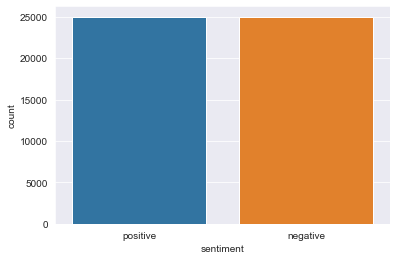

In [7]:
#use seaborn countplot to visualize the sentiment split
sns.countplot(x = df['sentiment'])

In [8]:
#To allow us to make more visualizations, use the len and apply func to add  a len col to the dataframe
df['len'] = df['review'].apply(len)

In [9]:
#check the head to see the result
df.head()

,review,sentiment,len
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


<AxesSubplot:xlabel='len', ylabel='Count'>

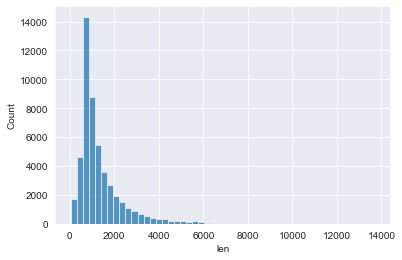

In [10]:
#use an histograme to do a count of the len col
sns.histplot(x = df['len'], bins=50)

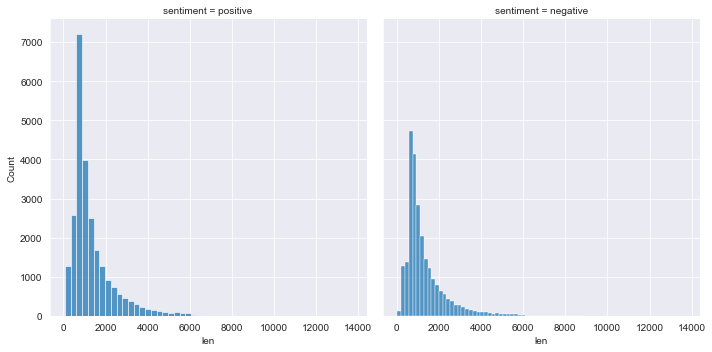

In [11]:
#create to histplot to check how the len col and sentiment col relate
g = sns.FacetGrid(df, col="sentiment",height=5)
g.map(sns.histplot, "len", bins=50)

We can see from the histplot that negative comments are averagely smaller than the positive comments

In [12]:
#if you haven't used stopwords before, you have to both import nltk and download stopwords
#import nltk
#nltk.download('stopwords')

In [13]:
#for the data cleanup, we can import string and then import the downloaded stopwords
import string
from nltk.corpus import stopwords

In [14]:
#we can thenm collect the english stopwords variables
stopwords = stopwords.words('english')
#also, append br since it's a reoccurring html tag
stopwords.append('br')

In [15]:
#also create a list of numbers as strings
numbers = ['1','2','3','4','5','6','7','8','9','0']

In [16]:
#create a function to remove the punctuations and the stopwords from the review
def text_process(mess):
    #remove the punctuations from the review
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #remove the numbers too
    nonum = [char for char in nopunc if char not in numbers]
    nonum = ''.join(nonum)
    
    #return the review as a list without the stopwords too
    return [word for word in nonum.split() if word.lower() not in stopwords]

In [17]:
#to test, extract a review data from the dataframe
review4 = df['review'][3]
review4

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [18]:
#apply the text_process func to test the data
print(text_process(review4))

['Basically', 'theres', 'family', 'little', 'boy', 'Jake', 'thinks', 'theres', 'zombie', 'closet', 'parents', 'fighting', 'timebr', 'movie', 'slower', 'soap', 'opera', 'suddenly', 'Jake', 'decides', 'become', 'Rambo', 'kill', 'zombiebr', 'OK', 'first', 'youre', 'going', 'make', 'film', 'must', 'Decide', 'thriller', 'drama', 'drama', 'movie', 'watchable', 'Parents', 'divorcing', 'arguing', 'like', 'real', 'life', 'Jake', 'closet', 'totally', 'ruins', 'film', 'expected', 'see', 'BOOGEYMAN', 'similar', 'movie', 'instead', 'watched', 'drama', 'meaningless', 'thriller', 'spotsbr', 'well', 'playing', 'parents', 'descent', 'dialogs', 'shots', 'Jake', 'ignore']


In [19]:
#import CountVectorizer to create a vector count of the words
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#import TfidfTransformer to determine the weight(importance) of each word
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
#import MultinomialNB to classify the train data
from sklearn.naive_bayes import MultinomialNB

In [22]:
#split the data using train_test_split
from sklearn.model_selection import train_test_split

In [23]:
#split the data into two pandas series X and y to hold the review and the sentiments, respectively
X = df['review']
y = df['sentiment']

In [24]:
#use the train_test_split to split the datas into train set and tests set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
#import Pipeline to link all 3 models together
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [27]:
#fit the train set into the pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000247ACFEC160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

now that our model is completed we can use our test set to see how accurate was our data

In [28]:
#first, create a prediction on the X_test using the model
predictions = pipeline.predict(X_test)

In [29]:
#import classification_report to check how accurate our predictions are
from sklearn.metrics import classification_report

In [30]:
#print the classification_report of the predictions against the result
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.87      7735
    positive       0.85      0.88      0.86      7265

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [31]:
#we can also run our model on a random data from the dataframe to compare the results
s = pipeline.predict(df['review'][10000:10001])
s

array(['negative'], dtype='<U8')

In [32]:
#check the results
df['sentiment'][10000]

'negative'

In [33]:
#We can also write a simple review to do more testing on the model built
ex1 = ['this is a great movie']
ex2 = ['this is a bad movie']

In [35]:
pipeline.predict(ex1)

array(['positive'], dtype='<U8')

In [36]:
pipeline.predict(ex2)

array(['negative'], dtype='<U8')

# Thanks